# **Installing libraries and Importing Dataset**

In [ ]:
# Install libraries and Import Dataset
import numpy as np
import pandas as pd
import os

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 37.0MB/s]


In [ ]:
!unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [ ]:
!pip install mplcyberpunk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
import mplcyberpunk
plt.style.use('cyberpunk')

In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# **Checking Missing Value**

<Axes: >

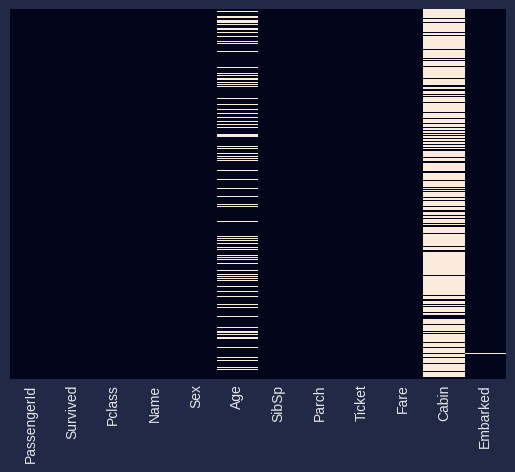

In [ ]:
sns.heatmap(data.isna(),yticklabels=False ,cbar=False)

In [ ]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data.drop('Cabin' , inplace = True ,axis=1)

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(891, 11)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **Handling Categorical Features**

In [ ]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [ ]:
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [ ]:
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
data = pd.concat([data,Sex,Embarked],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# **Visualizing Dataset After Cleaning**

<Axes: xlabel='Survived', ylabel='count'>

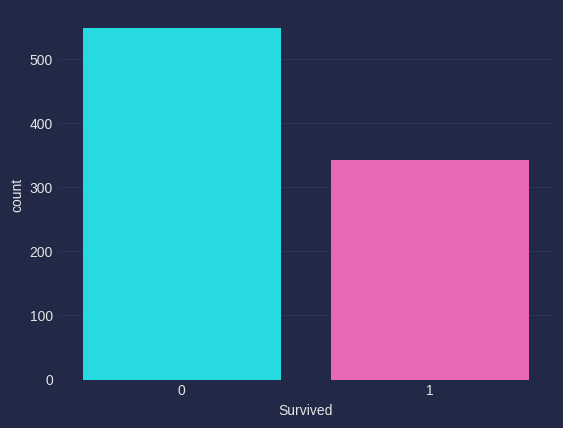

In [ ]:
sns.countplot(x = 'Survived' , data=data)

<Axes: xlabel='Survived', ylabel='count'>

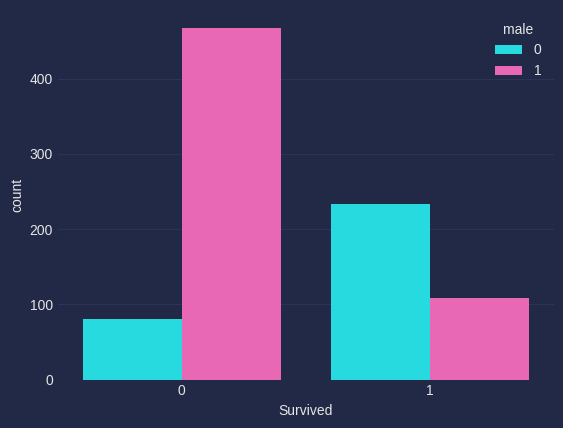

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='male')

<Axes: xlabel='Survived', ylabel='count'>

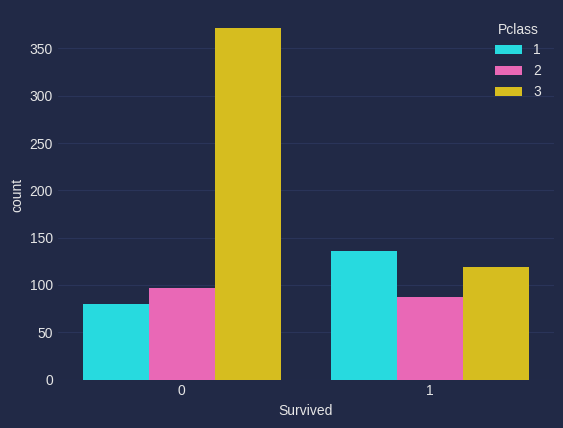

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='Pclass')

<Axes: >

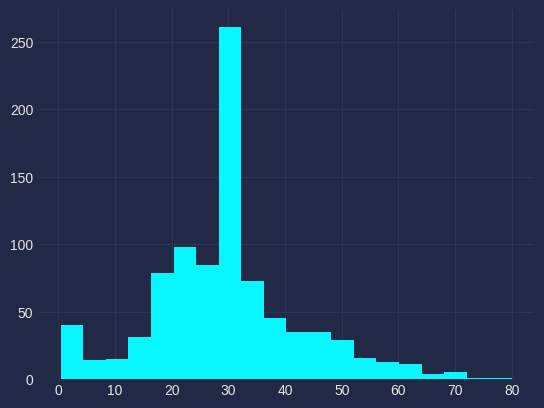

In [ ]:
data['Age'].hist(bins=20)

<Axes: >

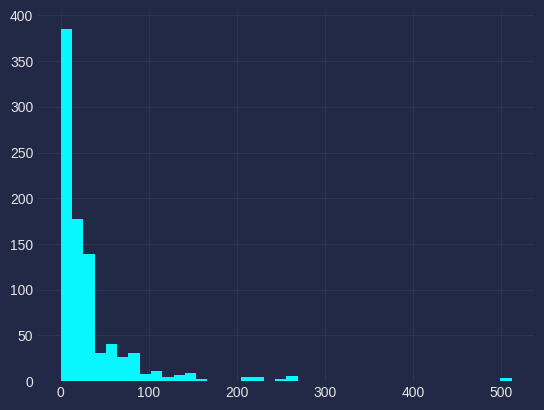

In [ ]:
data['Fare'].hist(bins=40)

<Axes: ylabel='Fare'>

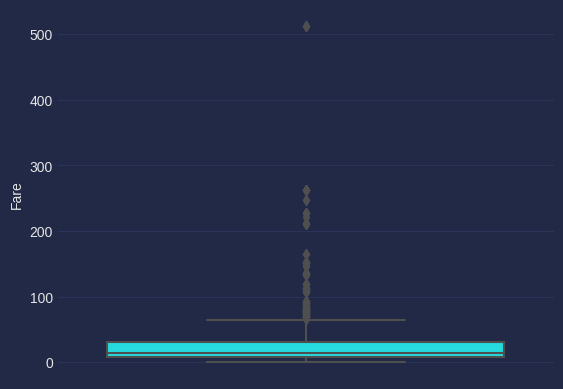

In [ ]:
sns.boxplot(y='Fare',data=data)

# **Data Pre-processing**

In [ ]:
le = LabelEncoder()
data['male'] = le.fit_transform(data['male'])
data['Q'] = le.fit_transform(data['Q'])
data['S'] = le.fit_transform(data['S'])

In [ ]:
sc = MinMaxScaler()
data['Fare'] = sc.fit_transform(data['Fare'].values.reshape(-1, 1))

Text(0, 0.5, 'Frequency')

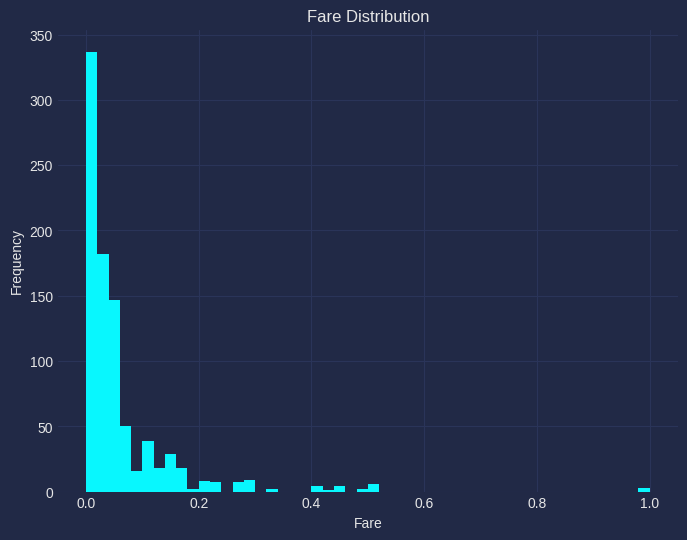

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data['Fare'], bins = 50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,1,0,1
1,2,1,1,38.0,1,0,0.139136,0,0,0
2,3,1,3,26.0,0,0,0.015469,0,0,1
3,4,1,1,35.0,1,0,0.103644,0,0,1
4,5,0,3,35.0,0,0,0.015713,1,0,1


# **Build Models**

In [ ]:
x = data.drop((['Survived' , 'PassengerId']) , axis = 1)
y = data['Survived']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 8), (179, 8), (712,), (179,))

## **Logistic Regression With GridSearchCV**

In [ ]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters:  {'C': 10, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceba

In [ ]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 79.21


In [ ]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 81.00558659217877


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

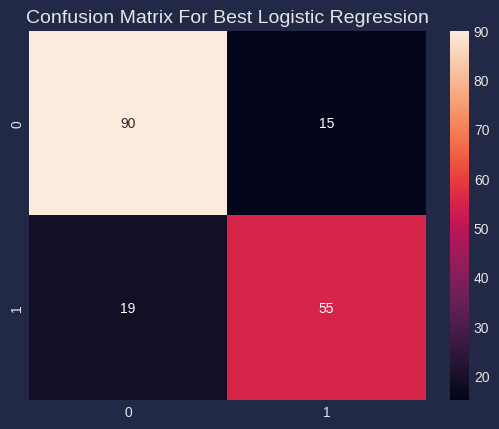

In [ ]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)

## **RandomForest With GridSearchCV**

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 100],
    'max_depth': [15, 20],
    'max_features': [2, 3],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [5, 10],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True]
}

rf_grid_model = GridSearchCV(rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
rf_grid_model.fit(x_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20], 'max_features': [2, 3],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [8, 10],
                         'n_estimators': [10, 100]},
             verbose=2)

In [ ]:
best_parameters = rf_grid_model.best_params_
print("Best Parameters: ", best_parameters)
best_score = rf_grid_model.best_score_
print("Best Cross-Validated Score: {:.2f}".format(best_score * 100))

# Access the best estimator (model)
best_rf_model = rf_grid_model.best_estimator_

Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 10}
Best Cross-Validated Score: 83.15


In [ ]:
RF_Grid_Score = best_rf_model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 81.56424581005587


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

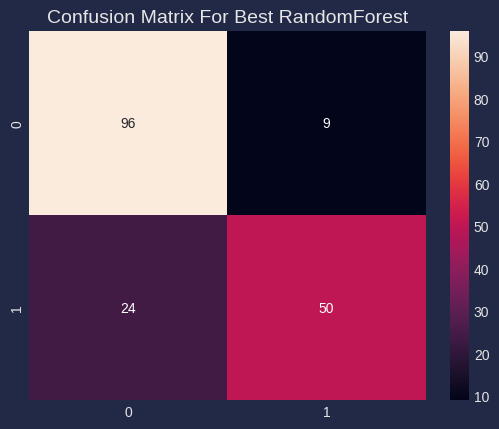

In [ ]:
rf_grid_y_pred = best_rf_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=10 ,criterion='gini',min_samples_split=4,min_samples_leaf=4,max_features=None,random_state=42)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [ ]:
y_train_pred_dt = decision_tree_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 88.48


In [ ]:
DT_Score = decision_tree_model.score(x_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 84.91620111731844


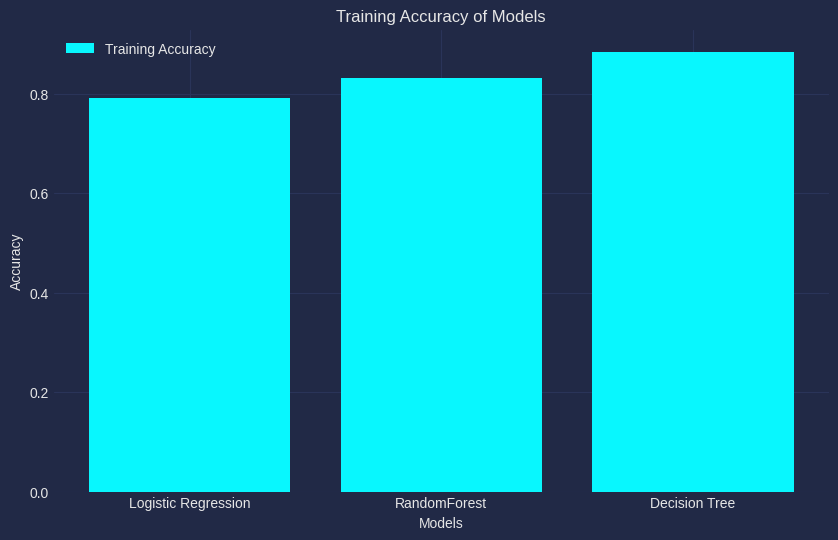

In [ ]:
model_names = ['Logistic Regression', 'RandomForest','Decision Tree']
train_accuracies = [lr_grid_model.best_score_,rf_grid_model.best_score_,accuracy_train_dt]
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, label='Training Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.legend()
plt.show()

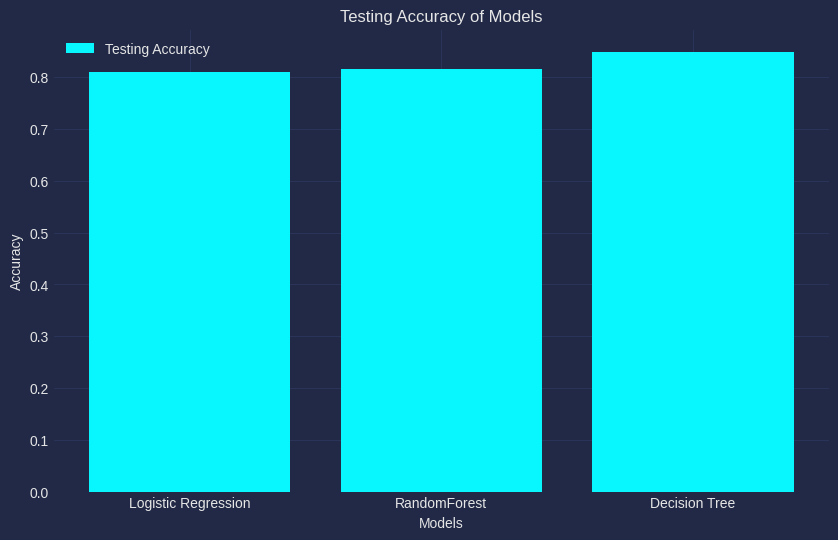

In [ ]:
plt.figure(figsize=(10, 6))
test_accuracies = [LR_Grid_Score, RF_Grid_Score,DT_Score]
plt.bar(model_names, test_accuracies, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Models')
plt.legend()

plt.show()

# **Prediction**

In [ ]:
def preprocess_input_data(input_data, train_columns):
    # Check if 'Cabin' column exists before dropping it
    if 'Cabin' in input_data.columns:
        input_data.drop(columns=['Cabin'], inplace=True)

    input_data['Age'].fillna(input_data['Age'].mean(), inplace=True)
    input_data['Embarked'].fillna(input_data['Embarked'].mode()[0], inplace=True)

    # Add missing column 'Sex'
    if 'Sex' not in input_data.columns:
        input_data['Sex'] = 0  # Assuming a default value for missing 'Sex'

    # Add missing columns present during training
    missing_columns = set(train_columns) - set(input_data.columns)
    for col in missing_columns:
        input_data[col] = 0

    input_data = pd.get_dummies(input_data, columns=['Embarked'], drop_first=True)

    # Reorder columns to match the order during training
    input_data = input_data[train_columns]

    return input_data

# use the model and input data for prediction as follows:

# Example input data (replace this with your actual input data)
input_data = pd.DataFrame({'Pclass': [3], 'Sex': ['male'], 'Age': [25], 'SibSp': [1], 'Parch': [0], 'Fare': [7.25], 'Embarked': ['S']})

# Make predictions
preprocessed_data = preprocess_input_data(input_data, x.columns)
predictions = best_rf_model.predict(preprocessed_data)

# Display predictions
print(f"The passenger is predicted to {'survive' if predictions[0] == 1 else 'not survive'}.")

The passenger is predicted to survive.
